In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Read MNIST dataset

In [31]:
url = 'https://drive.google.com/uc?id={}'.format('12HkjiJEuYgbxU3SaG0ZutQ6kwlCc4A9h')
data = pd.read_csv(url)

In [32]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

dev = data[0:1000].T
labels_dev = dev[0]
data_dev = dev[1:n]
data_dev = data_dev / 255.

train = data[1000:m].T
labels_train = train[0]
data_train = train[1:n]
data_train = data_train / 255.

In [33]:
def init():
  w1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  w2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return w1, b1, w2, b2

def prepareLabels(labels):
  result = np.zeros((labels.size, 10))
  result[np.arange(labels.size), labels] = 1
  return result.T

def ReLU(x):
  return np.maximum(x, 0)

def derivationReLU(x):
  return x > 0

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

def forward(w1, b1, w2, b2, data):
  z1 = w1.dot(data) + b1
  a1 = ReLU(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)
  return z1, a1, z2, a2

def backward(z1, a1, z2, a2, w1, w2, data, labels):
  dz2 = a2 - labels
  dw2 = 1 / m * dz2.dot(a1.T)
  db2 = 1 / m * np.sum(dz2)
  dz1 = w2.T.dot(dz2) * derivationReLU(z1)
  dw1 = 1 / m * dz1.dot(data.T)
  db1 = 1 / m * np.sum(dz1)
  return dw1, db1, dw2, db2

def update(w1, b1, w2, b2, dw1, db1, dw2, db2, learningRate):
  w1 -= learningRate * dw1
  b1 -= learningRate * db1
  w2 -= learningRate * dw2
  b2 -= learningRate * db2
  return w1, b1, w2, b2

def getAccuracy(a2, labels):
  return np.sum(np.argmax(a2, 0) == labels) / labels.size



In [34]:
def gradiendDescent(data, labels, learningRate, iterations):
  w1, b1, w2, b2 = init()
  preparedLabels = prepareLabels(labels)
  for i in range(iterations):
    z1, a1, z2, a2 = forward(w1, b1, w2, b2, data)
    dw1, db1, dw2, db2 = backward(z1, a1, z2, a2, w1, w2, data, preparedLabels)
    w1, b1, w2, b2 = update(w1, b1, w2, b2, dw1, db1, dw2, db2, learningRate)
    if i % 10 == 0:
      print('Iteration: ', i, ' Accuracy: ', getAccuracy(a2, labels))
  return w1, b1, w2, b2

In [35]:
w1, b1, w2, b2 = gradiendDescent(data_train, labels_train, 0.1, 500)

Iteration:  0  Accuracy:  0.10141463414634147
Iteration:  10  Accuracy:  0.18939024390243903
Iteration:  20  Accuracy:  0.2519268292682927
Iteration:  30  Accuracy:  0.30065853658536584
Iteration:  40  Accuracy:  0.33990243902439027
Iteration:  50  Accuracy:  0.3778780487804878
Iteration:  60  Accuracy:  0.42473170731707316
Iteration:  70  Accuracy:  0.4728292682926829
Iteration:  80  Accuracy:  0.510609756097561
Iteration:  90  Accuracy:  0.5432682926829269
Iteration:  100  Accuracy:  0.573560975609756
Iteration:  110  Accuracy:  0.6021219512195122
Iteration:  120  Accuracy:  0.6275365853658537
Iteration:  130  Accuracy:  0.6481463414634147
Iteration:  140  Accuracy:  0.666829268292683
Iteration:  150  Accuracy:  0.682609756097561
Iteration:  160  Accuracy:  0.6962195121951219
Iteration:  170  Accuracy:  0.7080975609756097
Iteration:  180  Accuracy:  0.7188780487804878
Iteration:  190  Accuracy:  0.7286585365853658
Iteration:  200  Accuracy:  0.7377073170731707
Iteration:  210  Accura

In [36]:
_, _, _, dev_A2 = forward(w1, b1, w2, b2, data_dev)
print('Dev Set Accuracy: ', getAccuracy(dev_A2, labels_dev))
predictions = np.argmax(dev_A2, 0)
good = np.argwhere(predictions == labels_dev)
bad = np.argwhere(predictions != labels_dev)

Dev Set Accuracy:  0.82


Prediction:  [9]  Label:  [9]


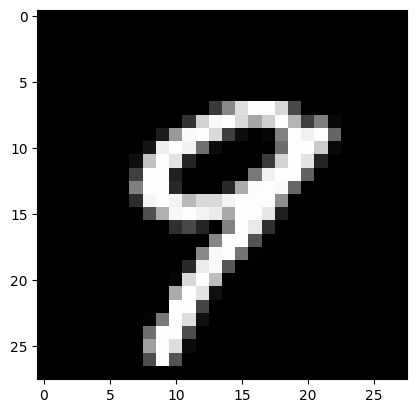

Prediction:  [2]  Label:  [2]


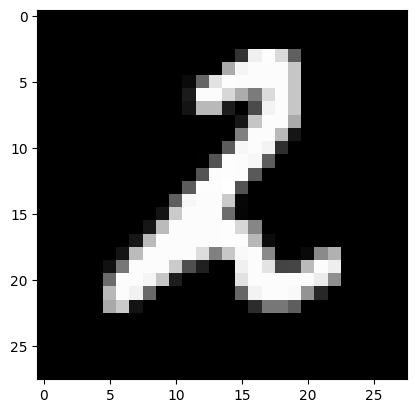

Prediction:  [3]  Label:  [2]


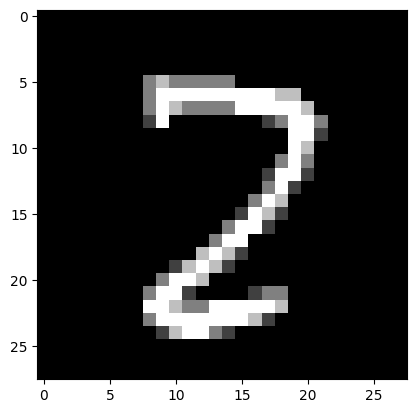

Prediction:  [0]  Label:  [2]


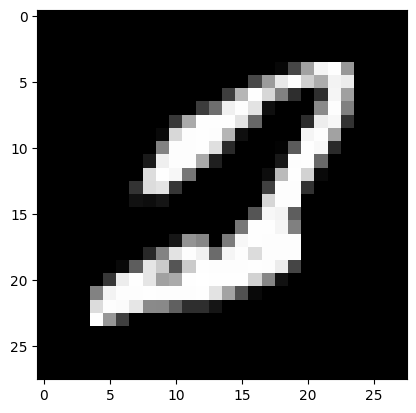

In [38]:
from matplotlib import pyplot as plt
def show_prediction(index):
  print('Prediction: ', predictions[index], ' Label: ', labels_dev[index])
  image = data_dev[:, index, None].reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(image, interpolation='nearest')
  plt.show()

show_prediction(good[0])
show_prediction(good[1])

show_prediction(bad[0])
show_prediction(bad[1])